# Predicting House Sale Prices

The task is to predict the cost of the houses in particular blocks based on different sociodemographic attributes 



## CHALLENGE - 1

Loading the required librarries

In [147]:
# import all required modules
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
%matplotlib inline

## CHALLENGE - 2

Load the data


In [148]:
df = fetch_california_housing(as_frame=True)["frame"]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


----------- Attribute Information ---------

* MedInc:  median income in block
* HouseAge:  median house age in block
* AveRooms:  average number of rooms
* AveBedrms:  average number of bedrooms
* Population:  block population
* AveOccup:  average house occupancy
* Latitude:  house block latitude
* Longitude:  house block longitude
* MedHouseVal: the median house value for California districts (!! our target variable !!)

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).


First, I will explore the dataset to understand and create a plan of action

In [150]:
df = fetch_california_housing(as_frame=True)["frame"]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Ouick observations about the dataset are:
* There are 20640 records of houses with 9 features for each
* All features (Columns) are float64 and there is Null value
* Normalization is required

# CHALLENGE 3: Explorative Data Analysis and Data Cleaning


Examine the data for outliers, missing values and try to apply some cleaning on the data. Provide visualization if possible
Do you see any patterns, correlations in the data? Please describe your observations

We can check the histogram of the features

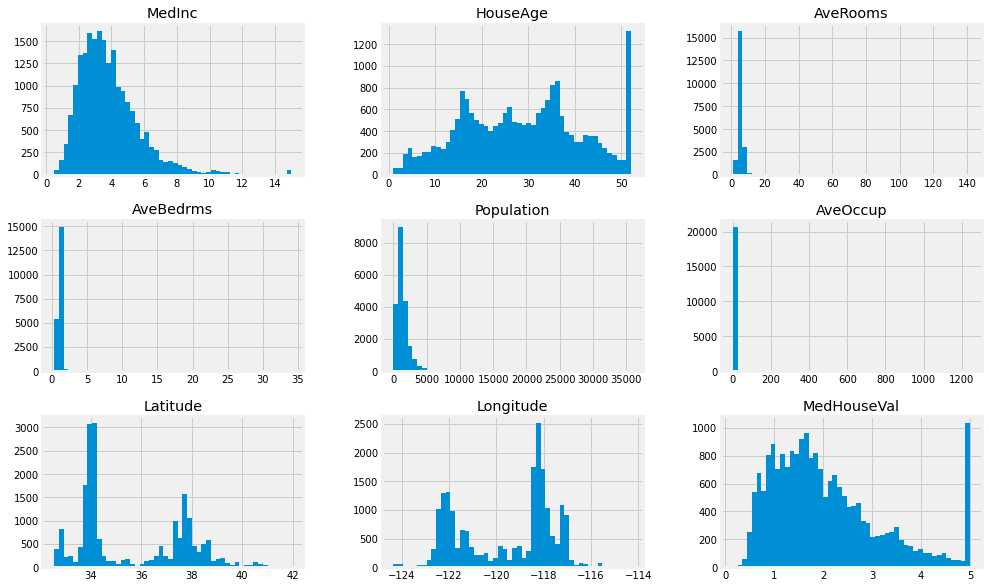

In [12]:
df.hist(bins=50, figsize=(15,10))
plt.show()

We can understand from the distrubition:

* Mostly they are not normal distrubition, this may require some features engineering
* HouseAge and MedHouseVal are interesting. House age may not go beyond the a certain value but House Val can cause problem for the training because it is what the model try to learn. The learning can be limitted to 5. This can be removed.
* Above we check the distrubion of the data and we can say that they are not normal distrubition mostly. Normaly, normal distrubuted data can introduce better results. If we are not satisfied with result we can come back to transform the distrubition.
*The attribute have different scales, this should be handled to avoid some features to become dominant over others.


Since prediction is based on Median Income Block, we need to make sure all blocks equally like in the traning

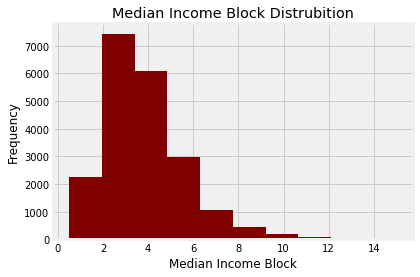

In [177]:
fig = plt.figure(figsize = (5,3))
ax = fig.add_axes([1,1,1,1])
ax.set(xlabel = 'Median Income Block',ylabel = 'Frequency',title = 'Median Income Block Distrubition')
df["MedInc"].hist(color = 'maroon',ax=ax)
plt.show()

Median Income are around 2-6 and some go far beyond 6. We need to consider this as well. We can use Stratified sampling
 

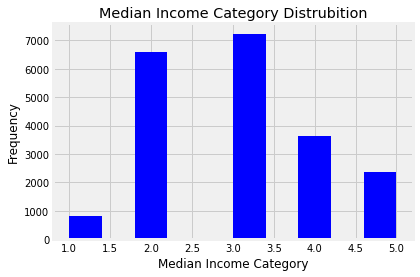

In [178]:
df["med_income_cat"] = pd.cut(df["MedInc"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

fig = plt.figure( figsize = (5,3))
ax = fig.add_axes([1,1,1,1])
ax.set(xlabel = 'Median Income Category',ylabel = 'Frequency',title = 'Median Income Category Distrubition')
df["med_income_cat"].hist(color = 'blue',ax=ax)
plt.show()

How is the coorelation between features?

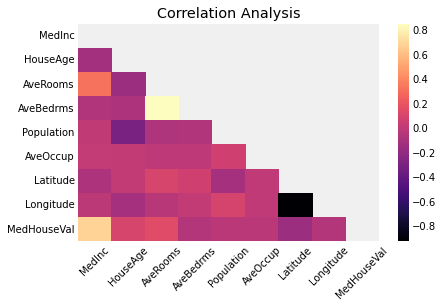

In [181]:
corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=False,lw=0,linecolor='white',cmap='magma',fmt = "0.2f")
plt.xticks(rotation=45)
plt.yticks(rotation = 0)
plt.show()

This coorelation shows that there is very strong relation between Medinc and MedHouseVal

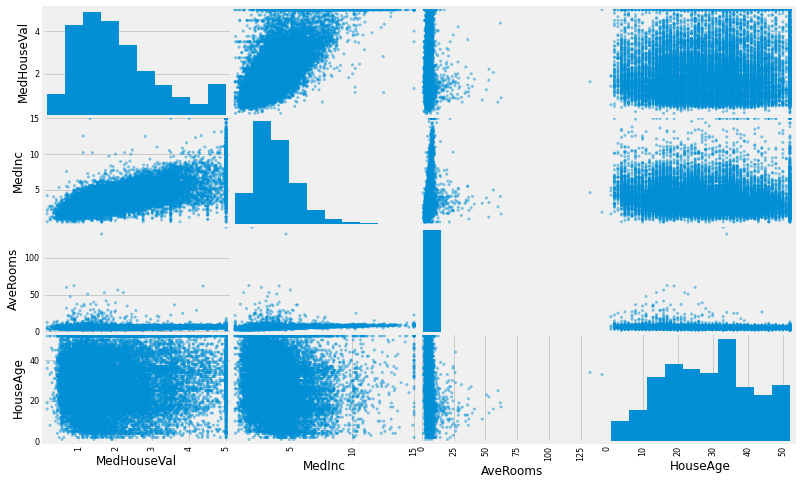

In [185]:
from pandas.plotting import scatter_matrix

attributes = ["MedHouseVal", "MedInc", "AveRooms",
              "HouseAge"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

# Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
#        'Latitude', 'Longitude', 'MedHouseVal'],
#       dtype='object')

By looking scttater plot, we see that MedInc is best feature for predicting the house price

# CHALLENGE 4: 

Now divide your dataset into train- and testset and apply any models you want

In [264]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=100)
for train_index, test_index in split.split(df, df["med_income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [283]:
# remove labels and keep the rest of the features
X_train =  strat_train_set.drop("MedHouseVal", axis=1).copy()
# Have the labels
y_train = strat_train_set["MedHouseVal"].copy()

In [284]:
# remove labels and keep the rest of the features
X_val =  strat_test_set.drop("MedHouseVal", axis=1).copy()
# Have the labels
y_val = strat_test_set["MedHouseVal"].copy()
print(X_val.shape, y_val.shape)

(4128, 9) (4128,)


In [285]:
nu_test = 100
X_val = X_val.iloc[:-nu_test,:]
X_test = X_val.iloc[-nu_test:,:]

y_val = y_val.iloc[:-nu_test]
y_test = y_val.iloc[-nu_test:]

print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(4028, 9) (4028,)
(100, 9) (100,)


In [286]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,med_income_cat
15397,6.2079,12.0,6.232210,0.973783,2106.0,2.629213,33.24,-117.20,5
14376,6.5970,33.0,7.016736,0.953975,629.0,2.631799,32.72,-117.25,5
4144,4.0417,44.0,4.322695,1.148936,1036.0,3.673759,34.12,-118.19,3
5076,2.2138,49.0,5.058376,1.131980,1052.0,2.670051,33.98,-118.32,2
7284,2.1250,37.0,3.657492,1.113150,1622.0,4.960245,33.98,-118.24,2


In [287]:
y_train.head()

15397    3.073
14376    4.964
4144     1.706
5076     1.198
7284     1.089
Name: MedHouseVal, dtype: float64

In [288]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [289]:
from sklearn.compose import ColumnTransformer

cat_attribs = ["med_income_cat"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(X_train.columns)),
         ("cat", OneHotEncoder(), cat_attribs),
    ])

In [290]:
X_train = full_pipeline.fit_transform(X_train)
X_train

array([[ 1.23332152, -1.32614758,  0.33563322, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.43843755,  0.34512024,  0.66469735, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.09139823,  1.22054624, -0.46529914, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.29900504, -0.76905831,  0.55218876, ...,  0.        ,
         0.        ,  1.        ],
       [-1.01283347, -0.3711374 , -0.65066005, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41699011, -1.08739504, -0.6382794 , ...,  1.        ,
         0.        ,  0.        ]])

In [291]:
X_val = full_pipeline.fit_transform(X_val)
X_val

array([[-0.65621799,  1.46027423, -0.16135264, ...,  0.        ,
         0.        ,  0.        ],
       [-0.15482033, -0.83175707, -0.06506938, ...,  1.        ,
         0.        ,  0.        ],
       [-0.19702412,  0.66991861, -0.10475754, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.09184546, -0.59465039,  0.34941265, ...,  1.        ,
         0.        ,  0.        ],
       [-0.68301818, -0.67368595, -0.23961694, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18461655, -0.19947257,  0.38365959, ...,  0.        ,
         0.        ,  1.        ]])

In [292]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

def model(n):
  return RandomForestRegressor(n_estimators=n, random_state=1)


# CHALLENGE 5: 
Measure the results of your models and apply model selection
Please argue why would you select one model over another

In [293]:
for n_estimators in [10,20,50,100,120,200]:
  forest_reg = model(n_estimators)
  forest_reg.fit(X_train, y_train)
  y_predictions = forest_reg.predict(X_val)
  forest_mse = mean_squared_error(y_val, y_predictions)
  forest_rmse = np.sqrt(forest_mse)
  forest_mar     = mean_absolute_error(y_val, y_predictions)
  print(f"RMSE:{forest_rmse} and MAE: {forest_mar} of the model with {n_estimators} estimator" )
 

RMSE:0.8323310517952918 and MAE: 0.5733042524826217 of the model with 10 estimator
RMSE:0.7908633693843578 and MAE: 0.5499109785253228 of the model with 20 estimator
RMSE:0.7797847699037745 and MAE: 0.539706023733863 of the model with 50 estimator
RMSE:0.7744484057946648 and MAE: 0.5339789375372391 of the model with 100 estimator
RMSE:0.7742788035623803 and MAE: 0.5344666965615685 of the model with 120 estimator
RMSE:0.7795957413906028 and MAE: 0.5386919491931474 of the model with 200 estimator


Random forrest with 100 estimator produces the best result

XGBoost generally gives the best result. Let us try it

In [314]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.0100000012)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)],
             verbose=False)

[00:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.0100000012, n_estimators=1000)

In [315]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(full_pipeline.fit_transform(X_test))
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.45191741302280425


As we guest, XGBoost produces better estimation

# CHALLENNGE 6: 

Write a summary report of your results, including plots and 
discussion of your results (You can reuse the outcome/plots from above). 
The report shall cover the following questions:

1. What was most interesting/surprising for you when you explored and visualized the data?

2. What was the biggest problem for you to complete all challenges, and how did you solve the problem?

3. Which model performed best, and why?


There are many datasets for house price prediction. This very dataset is quite old and compared to others, it does not have many features. 

The house price is strognly correlated with Income level. This is very suspicios and may be even considered as data leakage because this is information may not be avaliable at the time of estimation.

One of the challenge was to understand the data. I could not find enough expalnition about features. Beside, some columns are normalized and we dont know how?

XgBoost Model performed the best. This generally expected from boosting algoritim. For, big size data, using boosting may require longer time but since the size of data was not so big, we did not avoid from using a boosting algoritim.

### What can be done more?

We can do more feature engineering to get better performance.